In [1]:
import numpy as np
from sklearn import datasets
from pySVDD import SVDD
import matplotlib.pyplot as plt

X,y = datasets.make_moons(n_samples = 100 ,noise = 0.2)
y = 2*y - 1

In [7]:
clf = SVDD(1.,3.)
clf.fit(X,y)

In [8]:
# Function to generate design variable on grid
def cartesian(arrays, out=None):
    """
    Generate a cartesian product of input arrays.

    Parameters
    ----------
    arrays : list of array-like
        1-D arrays to form the cartesian product of.
    out : ndarray
        Array to place the cartesian product in.

    Returns
    -------
    out : ndarray
        2-D array of shape (M, len(arrays)) containing cartesian products
        formed of input arrays.

    Examples
    --------
    >>> cartesian(([1, 2, 3], [4, 5], [6, 7]))
    array([[1, 4, 6],
           [1, 4, 7],
           [1, 5, 6],
           [1, 5, 7],
           [2, 4, 6],
           [2, 4, 7],
           [2, 5, 6],
           [2, 5, 7],
           [3, 4, 6],
           [3, 4, 7],
           [3, 5, 6],
           [3, 5, 7]])

    """

    arrays = [np.asarray(x) for x in arrays]
    dtype = arrays[0].dtype

    n = np.prod([x.size for x in arrays])
    if out is None:
        out = np.zeros([n, len(arrays)], dtype=dtype)

    m = n / arrays[0].size
    out[:,0] = np.repeat(arrays[0], m)
    if arrays[1:]:
        cartesian(arrays[1:], out=out[0:m.astype(int),1:])
        for j in range(1, arrays[0].size):
            out[j*m.astype(int):(j+1)*m.astype(int),1:] = out[0:m.astype(int),1:]
    return out

In [9]:
num = 50
T = np.linspace(-2., 3., num = num)
C = np.linspace(-2., 2., num = num)
x = cartesian((T,C))
R2 = np.zeros(x.shape[0])
for i in range(x.shape[0]):
    R2[i] = clf.radius(x[i,:])
    
C = R2.reshape((num,num))
A = x[:,0].reshape((num,num))
B = x[:,1].reshape((num,num))

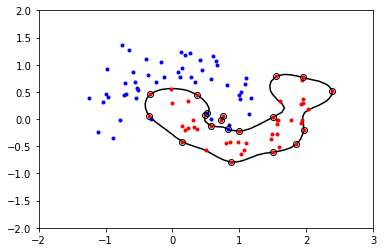

In [10]:
plt.plot(X[y==1,0],X[y==1,1],'r.')
plt.plot(X[y==-1,0],X[y==-1,1],'b.')
plt.plot(clf.sv[:,0],clf.sv[:,1],'ko', mfc='none')
plt.contour(A, B, C, levels = [clf.threshold], colors='black')
plt.show()

In [11]:
clf.beta

array([ 0.04862321,  0.12042125, -0.25877787,  0.07232359,  0.08416885,
        0.12713904,  0.10776557, -0.16299839,  0.06054441,  0.03583415,
        0.14010384,  0.01248868,  0.11962373,  0.07804124,  0.16673496,
        0.05538933,  0.05604299,  0.07094784,  0.06558355])